In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import  tqdm
import time
import sys
sys.path.append("../../")
from src.util import operators
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_nonlinear as compute_exp_val_nonlinear
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_linear as compute_exp_val_linear
from src.util import bath_correlation_function
from src.util import debye_spectral_density  
from src.homps import homps
from src.util import operators
from src.hops import hops
from src.util import noise_generator

# Simple test

In [122]:
# parameters for the bath correlation functions
g = np.array([2])
w = np.array([0.5+2j])
# time
duration = 50
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
h = operators.generate_spin_boson_hamiltonian()
L = sigma_z

In [123]:
N_steps = 1000
N_trunc = 16

## HOPS

In [124]:
def do_hops_runs(g, w, h, L, duration, N_steps, N_trunc, options, zts_debug):
    options['linear'] = True
    options['use_noise'] = False
    my_hops = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)
    psi_linear_no_noise = my_hops.compute_realizations(1)
    options['linear'] = True
    options['use_noise'] = True
    my_hops = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)
    psi_linear_noise = my_hops.compute_realizations(1, zts_debug=zts_debug)
    options['linear'] = False
    options['use_noise'] = False
    my_hops = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)
    psi_nonlinear_no_noise = my_hops.compute_realizations(1)
    options['linear'] = False
    options['use_noise'] = True
    my_hops = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)
    psi_nonlinear_noise = my_hops.compute_realizations(1, zts_debug=zts_debug)
    return psi_linear_no_noise, psi_linear_noise, psi_nonlinear_no_noise, psi_nonlinear_noise

In [125]:
options = {
    'linear' : False,
    'use_noise' : False,
}

In [126]:
options['linear'] = True
options['use_noise'] = True
my_hops = hops.HOPS_Engine_Simple(g, w, h, L, duration, N_steps, N_trunc, options)
zts_debug = my_hops.generator.sample_process()

In [127]:
psi_linear_no_noise, psi_linear_noise, psi_nonlinear_no_noise, psi_nonlinear_noise = do_hops_runs(g, w, h, L, duration, N_steps, N_trunc, options, zts_debug)

## HOMPS

In [128]:
def do_homps_runs(g, w, h, L, duration, N_steps, N_trunc, options, zts_debug):
    # physical
    options['rescale_aux'] = True
    options['linear'] = True
    options['use_noise'] = False
    my_homps = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options)
    psi_linear_no_noise_homps_physical = my_homps.compute_realizations(1)
    options['linear'] = True
    options['use_noise'] = True
    my_homps = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options)
    psi_linear_noise_homps_physical = my_homps.compute_realizations(1, zts_debug=zts_debug)
    options['linear'] = False
    options['use_noise'] = False
    my_homps = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options)
    psi_nonlinear_no_noise_homps_physical = my_homps.compute_realizations(1)
    options['linear'] = False
    options['use_noise'] = True
    my_homps = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options)
    psi_nonlinear_noise_homps_physical = my_homps.compute_realizations(1, zts_debug=zts_debug)
    # not physical
    options['rescale_aux'] = False
    options['linear'] = True
    options['use_noise'] = False
    my_homps = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options)
    psi_linear_no_noise_homps = my_homps.compute_realizations(1)
    options['linear'] = True
    options['use_noise'] = True
    my_homps = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options)
    psi_linear_noise_homps = my_homps.compute_realizations(1, zts_debug=zts_debug)
    options['linear'] = False
    options['use_noise'] = False
    my_homps = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options)
    psi_nonlinear_no_noise_homps = my_homps.compute_realizations(1)
    options['linear'] = False
    options['use_noise'] = True
    my_homps = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options)
    psi_nonlinear_noise_homps = my_homps.compute_realizations(1, zts_debug=zts_debug)
    return psi_linear_no_noise_homps_physical, psi_linear_noise_homps_physical, psi_nonlinear_no_noise_homps_physical, psi_nonlinear_noise_homps_physical, psi_linear_no_noise_homps, psi_linear_noise_homps, psi_nonlinear_no_noise_homps, psi_nonlinear_noise_homps

In [129]:
options = {
    'linear' : False,
    'use_noise' : False,
    'chi_max' : 10,
    'eps' : 0,
    'method' : 'RK4'
}

In [130]:
psi_linear_no_noise_homps_physical, psi_linear_noise_homps_physical, psi_nonlinear_no_noise_homps_physical, psi_nonlinear_noise_homps_physical, psi_linear_no_noise_homps, psi_linear_noise_homps, psi_nonlinear_no_noise_homps, psi_nonlinear_noise_homps = do_homps_runs(g, w, h, L, duration, N_steps, N_trunc, options, zts_debug)

## Compare

In [131]:
sigma_z_linear_no_noise = compute_exp_val_linear(psi_linear_no_noise, sigma_z)
sigma_z_linear_noise = compute_exp_val_linear(psi_linear_noise, sigma_z)
sigma_z_nonlinear_no_noise = compute_exp_val_nonlinear(psi_nonlinear_no_noise, sigma_z)
sigma_z_nonlinear_noise = compute_exp_val_nonlinear(psi_nonlinear_noise, sigma_z)
sigma_z_linear_no_noise_homps = compute_exp_val_linear(psi_linear_no_noise_homps, sigma_z)
sigma_z_linear_noise_homps = compute_exp_val_linear(psi_linear_noise_homps, sigma_z)
sigma_z_nonlinear_no_noise_homps = compute_exp_val_nonlinear(psi_nonlinear_no_noise_homps, sigma_z)
sigma_z_nonlinear_noise_homps = compute_exp_val_nonlinear(psi_nonlinear_noise_homps, sigma_z)
sigma_z_linear_no_noise_homps_physical = compute_exp_val_linear(psi_linear_no_noise_homps_physical, sigma_z)
sigma_z_linear_noise_homps_physical = compute_exp_val_linear(psi_linear_noise_homps_physical, sigma_z)
sigma_z_nonlinear_no_noise_homps_physical = compute_exp_val_nonlinear(psi_nonlinear_no_noise_homps_physical, sigma_z)
sigma_z_nonlinear_noise_homps_physical = compute_exp_val_nonlinear(psi_nonlinear_noise_homps_physical, sigma_z)

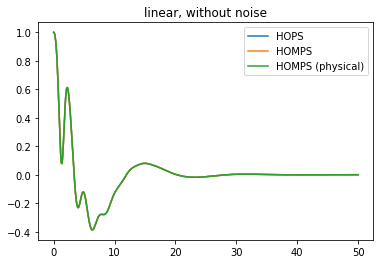

In [132]:
plt.plot(np.linspace(0, duration, N_steps), sigma_z_linear_no_noise, label="HOPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_linear_no_noise_homps, label="HOMPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_linear_no_noise_homps_physical, label="HOMPS (physical)")
plt.legend()
plt.title("linear, without noise")
plt.show()

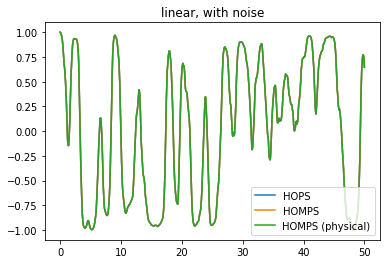

In [133]:
plt.plot(np.linspace(0, duration, N_steps), sigma_z_linear_noise, label="HOPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_linear_noise_homps, label="HOMPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_linear_noise_homps_physical, label="HOMPS (physical)")
plt.legend()
plt.title("linear, with noise")
plt.show()

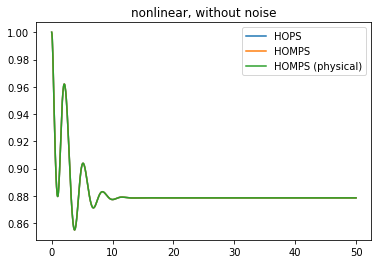

In [134]:
plt.plot(np.linspace(0, duration, N_steps), sigma_z_nonlinear_no_noise, label="HOPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_nonlinear_no_noise_homps, label="HOMPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_nonlinear_no_noise_homps_physical, label="HOMPS (physical)")
plt.legend()
plt.title("nonlinear, without noise")
plt.show()

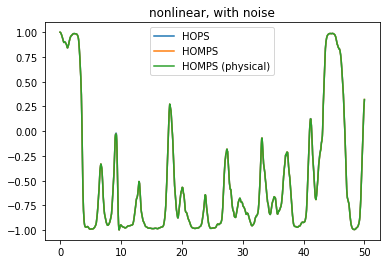

In [135]:
plt.plot(np.linspace(0, duration, N_steps), sigma_z_nonlinear_noise, label="HOPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_nonlinear_noise_homps, label="HOMPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_nonlinear_noise_homps_physical, label="HOMPS (physical)")
plt.legend()
plt.title("nonlinear, with noise")
plt.show()

# High T, low damping test

In [136]:
# Parameters for the spin-boson model
epsilon = 2.0
delta = -2.0
# Parameters for the Debye spectral density
beta = 0.5
T = 1/beta
gamma = 0.25
eta = 0.5
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
L = sigma_z
h = operators.generate_spin_boson_hamiltonian(delta=delta, epsilon=epsilon)
# time window
duration = 30

In [137]:
N_terms = 1
N_steps = 1000
N_trunc = 40

In [138]:
g, w = debye_spectral_density.get_debye_coefficients(N_terms, T, gamma, eta)

In [139]:
options = {
    'linear' : False,
    'use_noise' : False
}

In [140]:
psi_linear_no_noise, psi_linear_noise, psi_nonlinear_no_noise, psi_nonlinear_noise = do_hops_runs(g, w, h, L, duration, N_steps, N_trunc, options, zts_debug)

In [141]:
options = {
    'linear' : False,
    'use_noise' : False,
    'chi_max' : 10,
    'eps' : 0,
    'method' : 'RK4'
}

In [142]:
psi_linear_no_noise_homps_physical, psi_linear_noise_homps_physical, psi_nonlinear_no_noise_homps_physical, psi_nonlinear_noise_homps_physical, psi_linear_no_noise_homps, psi_linear_noise_homps, psi_nonlinear_no_noise_homps, psi_nonlinear_noise_homps = do_homps_runs(g, w, h, L, duration, N_steps, N_trunc, options, zts_debug)

In [143]:
sigma_z_linear_no_noise = compute_exp_val_linear(psi_linear_no_noise, sigma_z)
sigma_z_linear_noise = compute_exp_val_linear(psi_linear_noise, sigma_z)
sigma_z_nonlinear_no_noise = compute_exp_val_nonlinear(psi_nonlinear_no_noise, sigma_z)
sigma_z_nonlinear_noise = compute_exp_val_nonlinear(psi_nonlinear_noise, sigma_z)
sigma_z_linear_no_noise_homps = compute_exp_val_linear(psi_linear_no_noise_homps, sigma_z)
sigma_z_linear_noise_homps = compute_exp_val_linear(psi_linear_noise_homps, sigma_z)
sigma_z_nonlinear_no_noise_homps = compute_exp_val_nonlinear(psi_nonlinear_no_noise_homps, sigma_z)
sigma_z_nonlinear_noise_homps = compute_exp_val_nonlinear(psi_nonlinear_noise_homps, sigma_z)
sigma_z_linear_no_noise_homps_physical = compute_exp_val_linear(psi_linear_no_noise_homps_physical, sigma_z)
sigma_z_linear_noise_homps_physical = compute_exp_val_linear(psi_linear_noise_homps_physical, sigma_z)
sigma_z_nonlinear_no_noise_homps_physical = compute_exp_val_nonlinear(psi_nonlinear_no_noise_homps_physical, sigma_z)
sigma_z_nonlinear_noise_homps_physical = compute_exp_val_nonlinear(psi_nonlinear_noise_homps_physical, sigma_z)

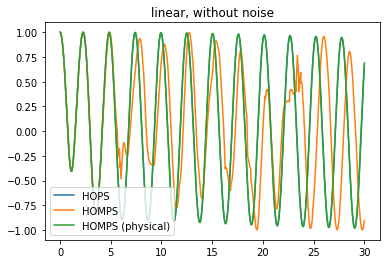

In [144]:
plt.plot(np.linspace(0, duration, N_steps), sigma_z_linear_no_noise, label="HOPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_linear_no_noise_homps, label="HOMPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_linear_no_noise_homps_physical, label="HOMPS (physical)")
plt.legend()
plt.title("linear, without noise")
plt.show()

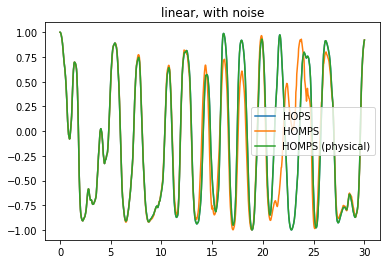

In [145]:
plt.plot(np.linspace(0, duration, N_steps), sigma_z_linear_noise, label="HOPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_linear_noise_homps, label="HOMPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_linear_noise_homps_physical, label="HOMPS (physical)")
plt.legend()
plt.title("linear, with noise")
plt.show()

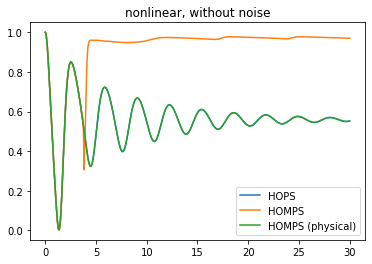

In [146]:
plt.plot(np.linspace(0, duration, N_steps), sigma_z_nonlinear_no_noise, label="HOPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_nonlinear_no_noise_homps, label="HOMPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_nonlinear_no_noise_homps_physical, label="HOMPS (physical)")
plt.legend()
plt.title("nonlinear, without noise")
plt.show()

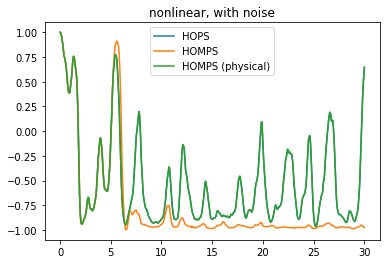

In [147]:
plt.plot(np.linspace(0, duration, N_steps), sigma_z_nonlinear_noise, label="HOPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_nonlinear_noise_homps, label="HOMPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_z_nonlinear_noise_homps_physical, label="HOMPS (physical)")
plt.legend()
plt.title("nonlinear, with noise")
plt.show()